In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import pyfftw
import pyqg
from pyqg import diagnostic_tools as tools

# 2-layer QG with imposed background shear

Running similar experiment to https://pyqg.readthedocs.io/en/latest/examples/two-layer.html but with my own parameters (parameters chosen from Jansen and Held, 2014).

In [6]:
# Run 2 layer QG for 10 years

L =  1000e3     # length scale of box    [m]
Ld = 12e3       # deformation scale      [m]
kd = 1. / Ld    # deformation wavenumber [m^-1]
Nx = 256.       # number of grid points

U1 = 0.01        # layer 1 background zonal velocity [m/s]
U2 = 0.          # layer 2 background zonal velocity [m/s]
H1 = 500.        # depth of layer 1
delta = 1.       # layer depth ratio, \delta = H_1 / H_2, with total depth H = H_1 + H_2

rek = 1 / (25 * 24 * 60 * 60) # linear bottom drag coeff.  [s^-1]
f0  = 1e-4                    # coriolis param [s^-1]
beta = 1.5e-11                # planetary vorticity gradient [m^-1 s^-1]

year = 24 * 60 * 60 * 365.    
tmax = 15 * year

# Run the model for 15 years, and start averaging after 5 years.

# model = pyqg.QGModel(nx = Nx, L = L, rd = Ld, U1 = U1, U2 = U2, H1 = H1,
#                     f = f0, beta = beta, rek=rek, delta = delta,
#                     tmax=tmax, twrite = 10000, tavestart = 5 * year)
# model.run()

INFO:  Logger initialized
INFO: Step: 10000, Time: 7.20e+07, KE: 1.94e-04, CFL: 0.147
INFO: Step: 20000, Time: 1.44e+08, KE: 1.66e-04, CFL: 0.140
INFO: Step: 30000, Time: 2.16e+08, KE: 1.50e-04, CFL: 0.163
INFO: Step: 40000, Time: 2.88e+08, KE: 1.52e-04, CFL: 0.148
INFO: Step: 50000, Time: 3.60e+08, KE: 1.55e-04, CFL: 0.134
INFO: Step: 60000, Time: 4.32e+08, KE: 1.46e-04, CFL: 0.142


In [78]:
# Convert to xarray for nice metadata etc.

m_ds = model.to_dataset().isel(time=-1)
m_ds

<xarray.Dataset>
Dimensions:            (k: 129, l: 256, lev: 2, lev_mid: 1, x: 256, y: 256)
Coordinates:
    time               float64 4.73e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
  * y                  (y) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.000798 0.0008042
Data variables:
    q                  (lev, y, x) float64 1.372e-05 1.117e-05 ... -4.261e-06
    u                  (lev, y, x) float64 -0.01404 -0.01231 ... 0.01066 0.01042
    v                  (lev, y, x) float64 0.02614 0.04099 ... 0.0002151
    ufull              (lev, y, x) float64 -0.004037 -0.002307 ... 0.01042
    vfull              (lev, y, x) float64 0.02614 0.04099 ... 0.0002151
    qh                 (lev, l, k) complex128 (0.03522926446609531+0j) ... (6...
    uh                 (lev, l, k) complex128 -0j ... (-2.8517617962943507e-2...
    vh                 (lev, l, k) complex128 0j ... (-3.650255099256769e-21-...
    ph                 (lev, l, k) complex128 0j ... (-2.8810220766260714e-18...
    dqhdt              (lev, l, k) complex128 (-0-0j) ... (9.053511003738206e...
    Ubg                (lev) float64 0.01 0.0
    Qy                 (lev) float64 4.972e-11 -1.972e-11
    dqdt               (lev, y, x) float64 8.716e-12 1.939e-11 ... -1.412e-12
    p                  (lev, y, x) float64 -1.616e+03 -1.483e+03 ... -311.2
    Ensspec            (lev, l, k) float64 2.89e-13 3.801e-16 ... 8.327e-58
    KEspec             (lev, l, k) float64 0.0 7.548e-10 ... 1.577e-48 3.726e-51
    EKEdiss            float64 1.187e-11
    KEfrictionspec     (l, k) float64 -0.0 -9.227e-17 ... -3.65e-55 -8.625e-58
    EKE                (lev) float64 0.0002796 2.564e-05
    Dissspec           (l, k) float64 -0.0 -0.0 -0.0 ... -1.264e-34 -6.158e-36
    ENSDissspec        (l, k) float64 0.0 0.0 0.0 ... -8.09e-41 -4.005e-42
    paramspec          (l, k) float64 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    ENSparamspec       (l, k) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    entspec            (l, k) float64 7.224e-14 1.066e-20 ... 5.91e-51 1.487e-53
    paramspec_APEflux  (l, k) float64 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    paramspec_KEflux   (l, k) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ENSflux            (l, k) float64 0.0 7.658e-25 ... 8.101e-41 4.011e-42
    ENSgenspec         (l, k) float64 0.0 -1.746e-24 ... 5.899e-64 5.33e-67
    ENSfrictionspec    (l, k) float64 0.0 -3.534e-25 ... -7.531e-62 -1.81e-64
    APEgenspec         (l, k) float64 0.0 -2.514e-16 ... 8.494e-56 7.675e-59
    APEflux            (l, k) float64 -0.0 6.845e-17 ... 6.843e-38 3.711e-39
    KEflux             (l, k) float64 0.0 8.644e-17 ... 1.264e-34 6.162e-36
    APEgen             float64 1.2e-11
Attributes:
    pyqg:beta:       1.5e-11
    pyqg:delta:      1.0
    pyqg:del2:       0.5
    pyqg:dt:         7200.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    pyqg:M:          65536
    pyqg:nk:         129
    pyqg:nl:         256
    pyqg:ntd:        1
    pyqg:nx:         256
    pyqg:ny:         256
    pyqg:nz:         2
    pyqg:rd:         12000.0
    pyqg:rek:        4.6296296296296297e-07
    pyqg:taveint:    86400.0
    pyqg:tavestart:  157680000.0
    pyqg:tc:         65700
    pyqg:tmax:       473040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

Text(0.5, 1.0, 'Upper Layer PV')

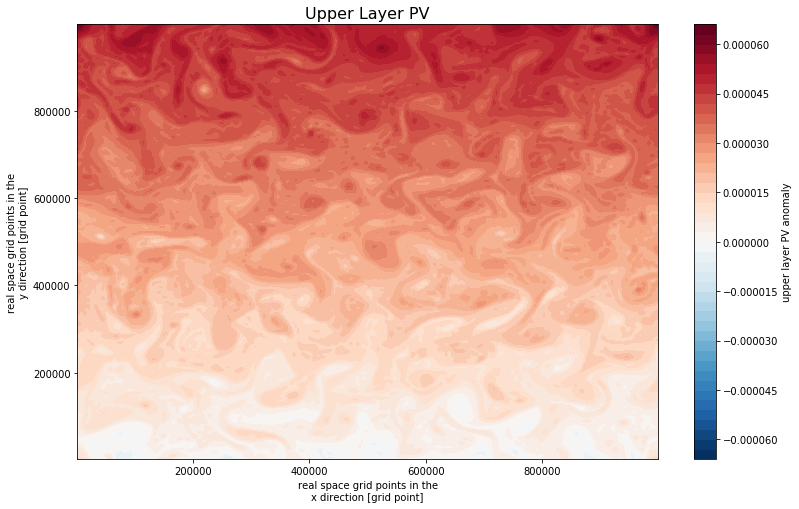

In [52]:
m_ds['q_upper'] = m_ds.q.isel(lev=0) + m_ds.Qy.isel(lev=0) * m_ds.y
m_ds['q_upper'].attrs = {'long_name': 'upper layer PV anomaly'}

plt.figure(figsize=(13,8))
fontsize=16
m_ds.q_upper.plot.contourf(levels = 50, cmap = 'RdBu_r')
# plt.xticks(fontsize=fontsize-2)
# plt.yticks(fontsize=fontsize-2)]\
plt.title('Upper Layer PV', fontsize = fontsize)

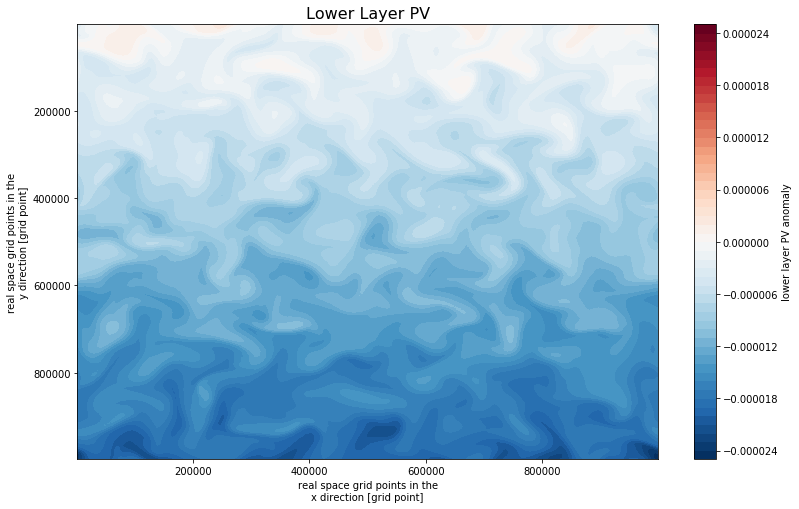

In [33]:
m_ds['q_lower'] = m_ds.q.isel(lev=1) + m_ds.Qy.isel(lev=1) * m_ds.y
m_ds['q_lower'].attrs = {'long_name': 'lower layer PV anomaly'}

plt.figure(figsize=(13,8))
fontsize=16
m_ds.q_lower.plot.contourf(levels = 50, cmap = 'RdBu_r')
# plt.xticks(fontsize=fontsize-2)
# plt.yticks(fontsize=fontsize-2)
plt.title('Lower Layer PV', fontsize = fontsize)
plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Kinetic Energy Spectrum')

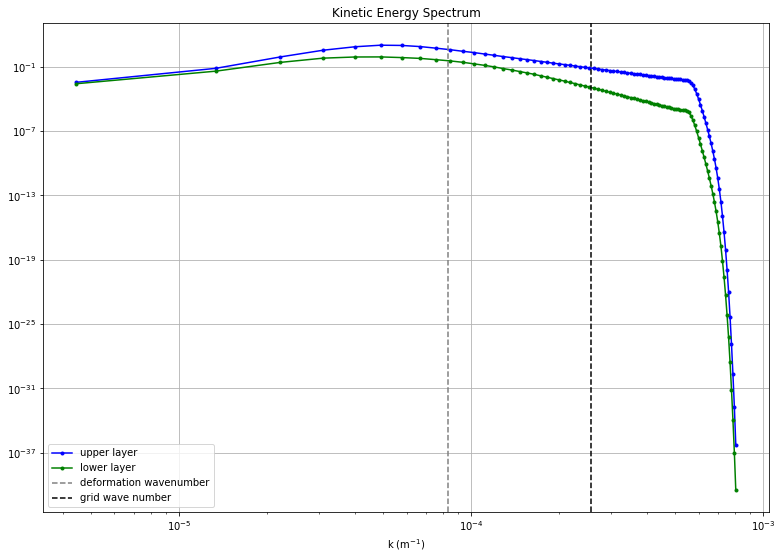

In [96]:
kr, kespec_upper = tools.calc_ispec(model, m_ds.KEspec.isel(lev = 0).data)
_, kespec_lower = tools.calc_ispec(model, m_ds.KEspec.isel(lev = 1).data)

plt.figure(figsize=(13,9))

plt.loglog(kr, kespec_upper, 'b.-', label='upper layer')
plt.loglog(kr, kespec_lower, 'g.-', label='lower layer')
plt.axvline(x = kd, color = 'gray', linestyle = '--', label = 'deformation wavenumber')
plt.axvline(x = 1 / (L/Nx), color='k', linestyle = '--', label = 'grid wave number')

plt.legend(loc='lower left')
plt.xlabel(r'k (m$^{-1}$)')
plt.grid()
# plt.ylim(1e-15, None)
plt.title('Kinetic Energy Spectrum')

Text(0.5, 1.0, 'Spectral Energy Transfer')

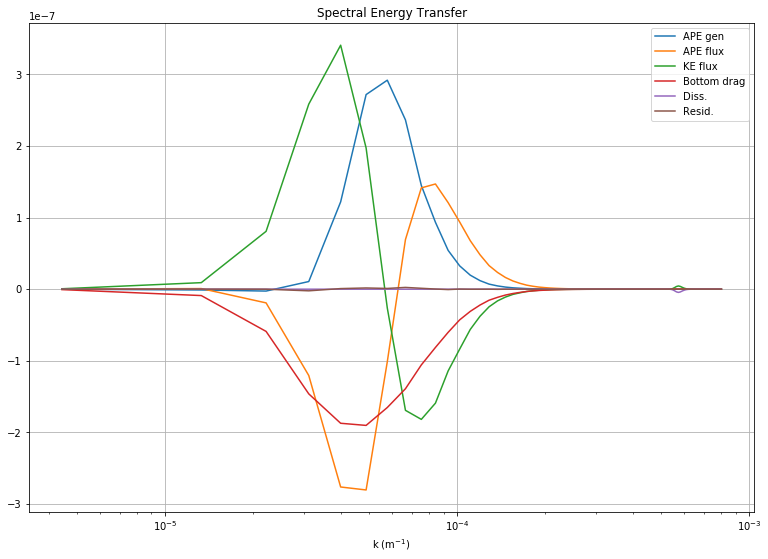

In [72]:
kr, APEgenspec = tools.calc_ispec(model, m_ds.APEgenspec.data)
_, APEflux     = tools.calc_ispec(model, m_ds.APEflux.data)
_, KEflux      = tools.calc_ispec(model, m_ds.KEflux.data)
_, KEfrictionspec = tools.calc_ispec(model, m_ds.KEfrictionspec.data)
_, Dissspec    = tools.calc_ispec(model, m_ds.Dissspec.data)

plt.figure(figsize=(13,9))

ebud = [APEgenspec,
         APEflux,
         KEflux,
         KEfrictionspec,
         Dissspec]
ebud.append(-np.vstack(ebud).sum(axis = 0))
ebud_labels = ['APE gen', 'APE flux', 'KE flux', 'Bottom drag', 'Diss.', 'Resid.']
[plt.semilogx(kr, term) for term in ebud]

plt.legend(ebud_labels, loc = 'upper right')
plt.xlabel(r'k (m$^{-1}$)')
plt.grid()
plt.title('Spectral Energy Transfer')

# Streamfunction

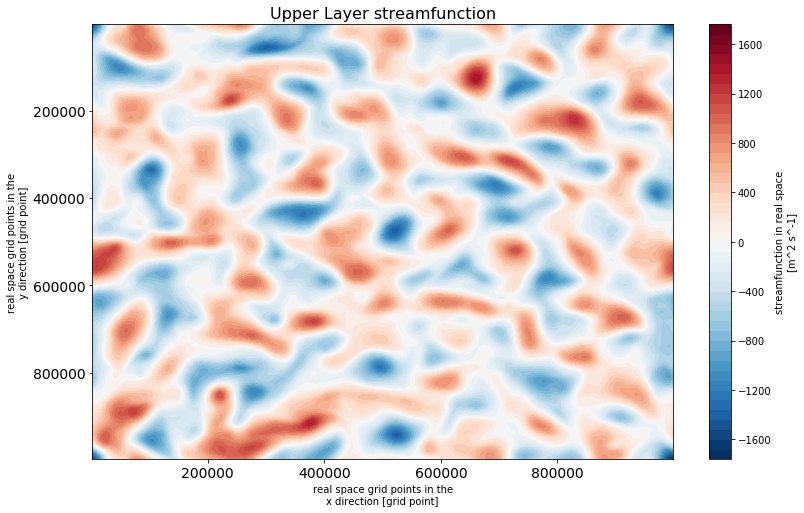

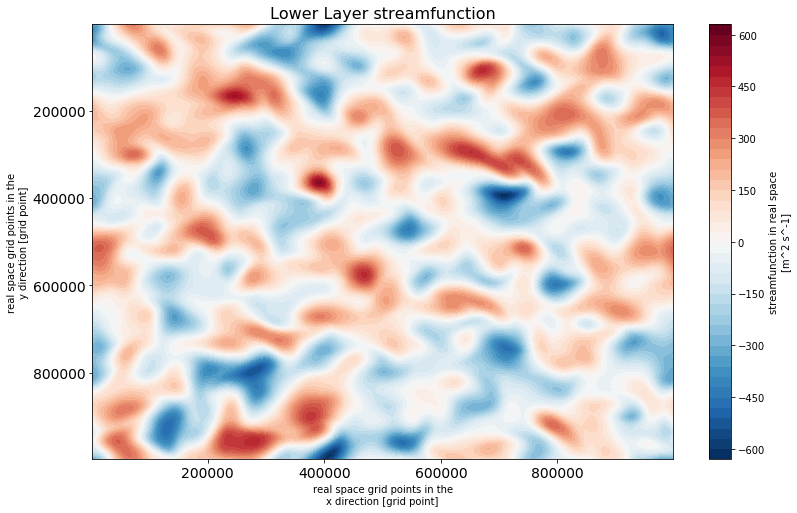

In [87]:
psi1 = m_ds.p.isel(lev = 0)
psi2 = m_ds.p.isel(lev = 1)

plt.figure(figsize=(13,8))
fontsize=16
psi1.plot.contourf(levels = 50, cmap = 'RdBu_r')
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.title('Upper Layer streamfunction', fontsize = fontsize)
plt.gca().invert_yaxis()

plt.figure(figsize=(13,8))
fontsize=16
psi2.plot.contourf(levels = 50, cmap = 'RdBu_r')
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.title('Lower Layer streamfunction', fontsize = fontsize)
plt.gca().invert_yaxis()